# For select genesets, find the intersection between that geneset and its corresponding cNMF module
#### _CK, 2022_

### What this does:
- For Type 2 cytokine signaling and IFNgamma signaling genesets
- Makes a venn diagram between published genesets and the top genes in the corresponding cNMF module in our data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "Helvetica"

In [8]:
# Loaad in cNMF top genes
cnmf_gene_lists = pd.read_csv("figures/p1_2_k_26_combined_knee_2_top_genes_filtered.csv")
cnmf_wh = cnmf_gene_lists['wound healing'].dropna().values
cnmf_ifng = cnmf_gene_lists['IFNgamma'].dropna().values


# Load in publically available genesets
biocarta_il4_pathway = ['AKT1','GRB2','IL2RG','IL4','IL4R','IRS1','JAK1','JAK3','RPS6KB1','SHC1','STAT6']
liu_il4_signaaling =   ["ALOX5","ANKRD33B","APPL2","ARPC5","ATPAF1","ATXN1","BATF","BCKDK","BCL6","BHLHE40","CCL4","CCL5","CCN2","CD69","CD79B","CD86","CFLAR","CISH","CLTC","CMTM6","CNTN6","CTSD","EBF1","EGR1","EIF4G1","EVI2A","FCER2","FGL2","GCSAM","GNAS","GNG2","GSR","HLA-DRB5","HLX","HOMER2","HOXC4","HUWE1","IL2RA","IL4R","IL6","IRF8","KLF13","KMO","LY75","MAL","MAP3K5","METTL14","MGLL","MOK","MRPS15","MTCL1","MTMR9","NCF2","NCOA3","NEK6","NFIL3","NFKBIZ","PDE7A","PEG10","PHF20L1","PKN2","PMAIP1","PPP2CA","PPP6C","QSOX1","RASGRP3","RGS6","RPL5","RPS2","SAMSN1","SEL1L3","SELL","SIAH2","SLA","SLC15A2","SLC39A8","SMARCA2","SOCS1","SPAG1","SPINT2","STAT4","STK4","TLR3","TLR7","TNFAIP3","TNFRSF11A","VCL","VEGFC","WT1","XBP1","ZBED2"]
reactome_il4_pathway = ["AKT1","ALOX15","ALOX5","ANXA1","BATF","BCL2","BCL2L1","BCL6","BIRC5","CCL11","CCL2","CCL22","CCND1","CD36","CDKN1A","CEBPD","COL1A2","CXCL8","F13A1","FASLG","FCER2","FGF2","FN1","FOS","FOXO1","FOXO3","FSCN1","GATA3","HGF","HIF1A","HMOX1","HSP90AA1","HSP90B1","HSPA8","ICAM1","IGHE","IGHG1","IGHG4","IL10","IL12A","IL12B","IL13","IL13RA1","IL13RA2","IL17A","IL17F","IL18","IL1A","IL1B","IL23A","IL23R","IL2RG","IL4","IL4R","IL6","IL6R","IRF4","ITGAM","ITGAX","ITGB1","ITGB2","JAK1","JAK2","JAK3","JUNB","LAMA5","LBP","LCN2","LIF","MAOA","MCL1","MMP1","MMP2","MMP3","MMP9","MUC1","MYC","NANOG","NDN","NOS2","OPRD1","OPRM1","OSM","PIK3R1","PIM1","POMC","POU2F1","PTGS2","RHOU","RORA","RORC","S1PR1","SAA1","SOCS1","SOCS3","SOCS5","SOX2","STAT1","STAT3","STAT6","TGFB1","TIMP1","TNF","TNFRSF1B","TP53","TWIST1","TYK2","VCAM1","VEGFA","VIM","ZEB1"]
hallmark_ifng = ["ADAR","APOL6","ARID5B","ARL4A","AUTS2","B2M","BANK1","BATF2","BPGM","BST2","BTG1","C1R","C1S","CASP1","CASP3","CASP4","CASP7","CASP8","CCL2","CCL5","CCL7","CD274","CD38","CD40","CD69","CD74","CD86","CDKN1A","CFB","CFH","CIITA","CMKLR1","CMPK2","CMTR1","CSF2RB","CXCL10","CXCL11","CXCL9","DDX58","DDX60","DHX58","EIF2AK2","EIF4E3","EPSTI1","FAS","FCGR1A","FGL2","FPR1","GBP4","GBP6","GCH1","GPR18","GZMA","HELZ2","HERC6","HIF1A","HLA-A","HLA-B","HLA-DMA","HLA-DQA1","HLA-DRB1","HLA-G","ICAM1","IDO1","IFI27","IFI30","IFI35","IFI44","IFI44L","IFIH1","IFIT1","IFIT2","IFIT3","IFITM2","IFITM3","IFNAR2","IL10RA","IL15","IL15RA","IL18BP","IL2RB","IL4R","IL6","IL7","IRF1","IRF2","IRF4","IRF5","IRF7","IRF8","IRF9","ISG15","ISG20","ISOC1","ITGB7","JAK2","KLRK1","LAP3","LATS2","LCP2","LGALS3BP","LY6E","LYSMD2","MARCHF1","METTL7B","MT2A","MTHFD2","MVP","MX1","MX2","MYD88","NAMPT","NCOA3","NFKB1","NFKBIA","NLRC5","NMI","NOD1","NUP93","OAS2","OAS3","OASL","OGFR","P2RY14","PARP12","PARP14","PDE4B","PELI1","PFKP","PIM1","PLA2G4A","PLSCR1","PML","PNP","PNPT1","PSMA2","PSMA3","PSMB10","PSMB2","PSMB8","PSMB9","PSME1","PSME2","PTGS2","PTPN1","PTPN2","PTPN6","RAPGEF6","RBCK1","RIPK1","RIPK2","RNF213","RNF31","RSAD2","RTP4","SAMD9L","SAMHD1","SECTM1","SELP","SERPING1","SLAMF7","SLC25A28","SOCS1","SOCS3","SOD2","SP110","SPPL2A","SRI","SSPN","ST3GAL5","ST8SIA4","STAT1","STAT2","STAT3","STAT4","TAP1","TAPBP","TDRD7","TNFAIP2","TNFAIP3","TNFAIP6","TNFSF10","TOR1B","TRAFD1","TRIM14","TRIM21","TRIM25","TRIM26","TXNIP","UBE2L6","UPP1","USP18","VAMP5","VAMP8","VCAM1","WARS1","XAF1","XCL1","ZBP1","ZNFX1"]

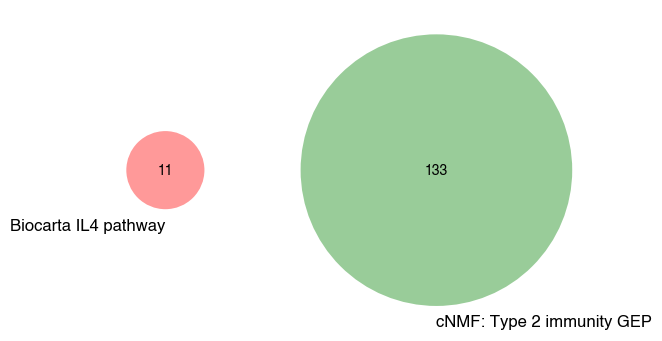

In [18]:
venn2(subsets = (len(biocarta_il4_pathway)-len(np.intersect1d(cnmf_wh,biocarta_il4_pathway)), len(cnmf_wh)-len(np.intersect1d(cnmf_wh,biocarta_il4_pathway)), len(np.intersect1d(cnmf_wh,biocarta_il4_pathway))), set_labels = ('Biocarta IL4 pathway', 'cNMF: Type 2 immunity GEP'))
plt.savefig("/Users/connerkummerlowe/Dropbox (MIT)/Compressed Screening/FIGURES & TABLES/Figures/Fig3/il4_ven_biocarta.pdf")

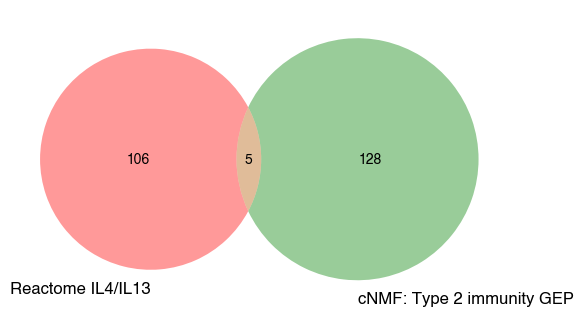

In [17]:
venn2(subsets = (len(reactome_il4_pathway)-len(np.intersect1d(cnmf_wh,reactome_il4_pathway)), len(cnmf_wh)-len(np.intersect1d(cnmf_wh,reactome_il4_pathway)), len(np.intersect1d(cnmf_wh,reactome_il4_pathway))), set_labels = ('Reactome IL4/IL13', 'cNMF: Type 2 immunity GEP'))
plt.savefig("/Users/connerkummerlowe/Dropbox (MIT)/Compressed Screening/FIGURES & TABLES/Figures/Fig3/il4_ven_reactome.pdf")a

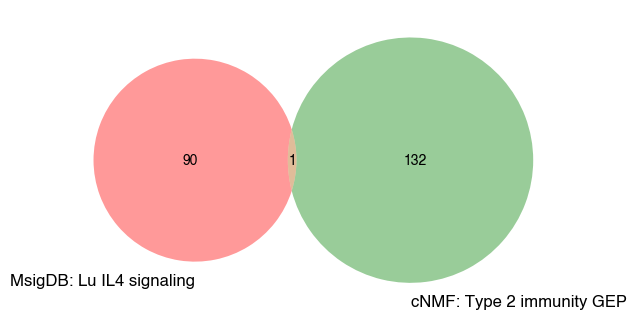

In [35]:
venn2(subsets = (len(liu_il4_signaaling)-len(np.intersect1d(cnmf_wh,liu_il4_signaaling)), len(cnmf_wh)-len(np.intersect1d(cnmf_wh,liu_il4_signaaling)), len(np.intersect1d(cnmf_wh,liu_il4_signaaling))), set_labels = ('MsigDB: Lu IL4 signaling', 'cNMF: Type 2 immunity GEP'))
plt.savefig("/Users/connerkummerlowe/Dropbox (MIT)/Compressed Screening/Latest Draft/Figures/Fig3/il4_ven.pdf")

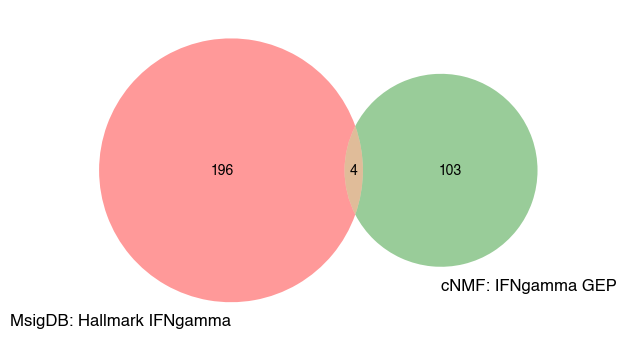

In [36]:

venn2(subsets = (len(hallmark_ifng)-len(ifng_intersect), len(cnmf_ifng)-len(ifng_intersect), len(ifng_intersect)), set_labels = ('MsigDB: Hallmark IFNgamma', 'cNMF: IFNgamma GEP'))
plt.savefig("/Users/connerkummerlowe/Dropbox (MIT)/Compressed Screening/Latest Draft/Figures/Fig3/ifng_ven.pdf")

In [ ]:
cnmf_ifng.sort()
cnmf_wh.sort()
liu_il4_signaaling.sort()
x = pd.DataFrame({"msigdb_hallmark_ifngamma":hallmark_ifng,"cnmf_ifngamma":cnmf_ifng.tolist() + ['']*(len(hallmark_ifng)-len(cnmf_ifng)),
                    "msigdb_lu_il4":liu_il4_signaaling+['']*(len(hallmark_ifng)-len(liu_il4_signaaling)),
                    "cnmf_type_2_immunity":cnmf_wh.tolist()+['']*(len(hallmark_ifng)-len(cnmf_wh))})
x.to_csv("/Users/connerkummerlowe/Dropbox (MIT)/Compressed Screening/LATEST DRAFT/FIGURES/Fig2/gene_lists.csv")
                